In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Data Manager

In [23]:
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\1.xlsx')

Scaling the data

In [24]:
scaler=RobustScaler()
std_data = scaler.fit(data.loc[:,'Pb':])
std_data = scaler.transform(data.loc[:,'Pb':])
std_data = pd.DataFrame(std_data, columns = data.columns[6:27])
std_data = pd.concat([data.loc[:,'form':'h'], std_data], axis=1)

Pearson

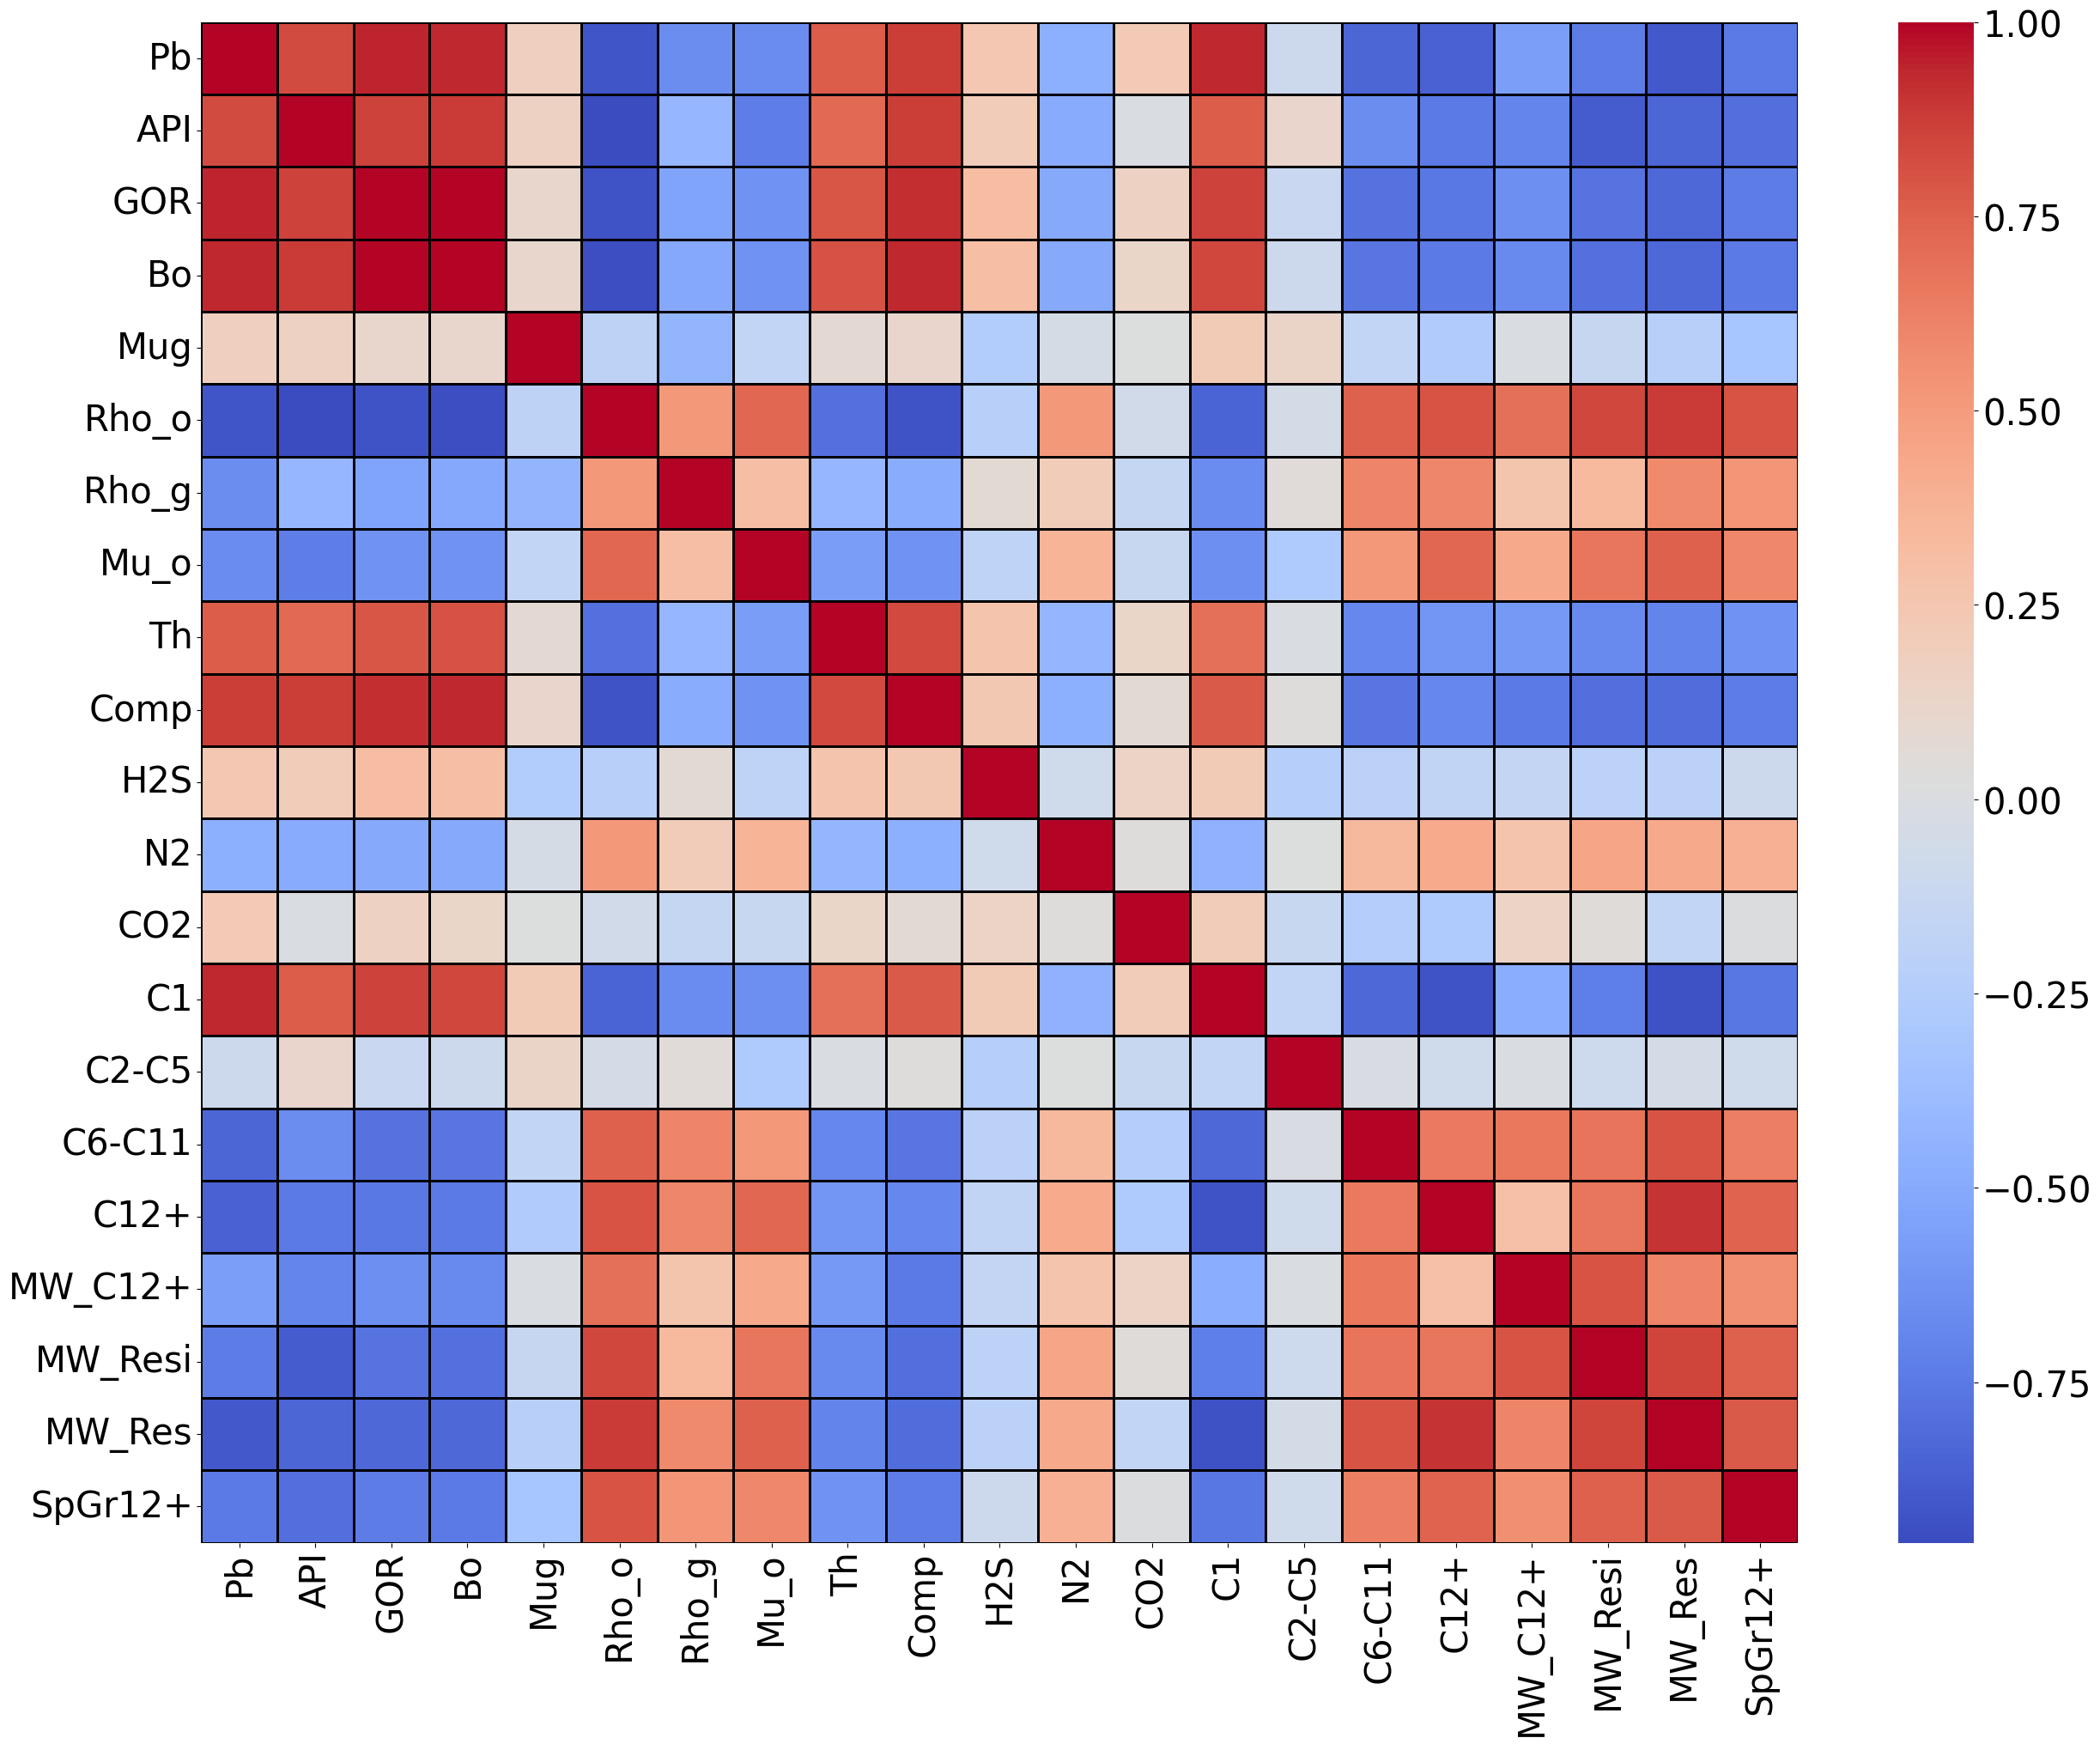

In [4]:
pearson = std_data.loc[:,'Pb':].corr()

fig=plt.figure(figsize=(30,23))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
sns.heatmap(std_data.loc[:,'Pb':].corr(), cmap='coolwarm', annot=False, linewidths=2, linecolor='black')
plt.savefig('plot.png')
plt.show()


Dropping some data based on what we learned from pearson

In [25]:
std_data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)
data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)

Separation of Data based on Formation

In [26]:
FAH_S = std_data[(std_data.form == "FAH")]
ILM_S = std_data[(std_data.form == "ILM")]
SAR_S = std_data[(std_data.form == "SAR")]
GAD_S = std_data[(std_data.form == "GAD")]
KZH_S = std_data[(std_data.form == "KZH")]
ASM_S = std_data[(std_data.form == "ASM")]

FAH = data[(data.form == "FAH")]
ILM = data[(data.form == "ILM")]
SAR = data[(data.form == "SAR")]
GAD = data[(data.form == "GAD")]
KZH = data[(data.form == "KZH")]
ASM = data[(data.form == "ASM")]

Pb_FAH_Depth_Corr = FAH.loc[0:142,'Pb']+FAH.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)
Pb_FAH_Depth_Corr = pd.DataFrame(Pb_FAH_Depth_Corr)
Pb_FAH_Depth_Corr[1] = FAH.loc[0:142,'h']

#sns.pairplot(FAH)
#plt.show()

In [27]:
pearson = FAH.corr()
print(pearson['x':'y'])

          x         y        Pb       Mug     Rho_o     Rho_g      Mu_o  \
x  1.000000 -0.816389  0.293772 -0.350341 -0.466130 -0.098983 -0.281439   
y -0.816389  1.000000 -0.055377  0.216979  0.309756  0.023975  0.064060   

         Th       H2S        N2       CO2        C1     C2-C5    C6-C11  \
x  0.384604 -0.019747 -0.116314  0.010432  0.250875 -0.123709 -0.198426   
y -0.357352  0.168980  0.242561  0.061852 -0.023960  0.016420  0.160252   

    MW_C12+   MW_Resi   SpGr12+  
x -0.248765 -0.476898 -0.149349  
y  0.435036  0.649464  0.237378  


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_10280\3366894306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = FAH.corr()


Plots based on location and depth

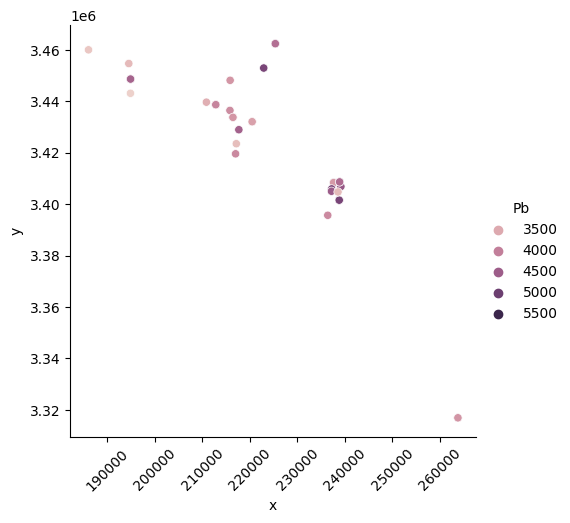

In [28]:
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
sns.relplot(data=FAH, x="x", y="y", hue="Pb")
plt.xticks(rotation = 45)
plt.show()

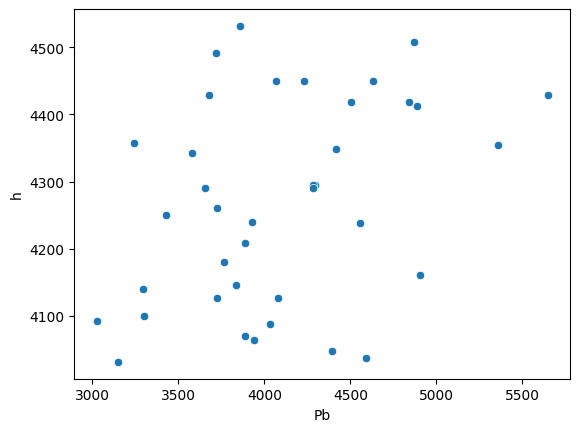

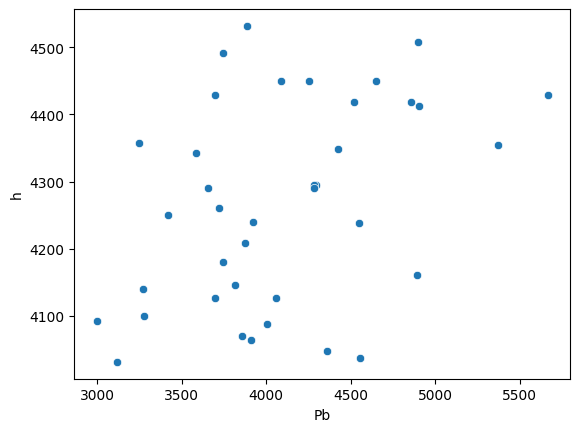

In [29]:
sns.scatterplot(data=FAH, x='Pb', y="h", sizes=(10, 100))
plt.show()

sns.scatterplot(Pb_FAH_Depth_Corr, x=Pb_FAH_Depth_Corr[0], y=Pb_FAH_Depth_Corr[1])
plt.xlabel('Pb')
plt.ylabel('h')
plt.show()

Isolation Forest


0     -0.081724
1      0.026686
2      0.076589
7      0.106067
8      0.050571
9     -0.010146
10    -0.031081
11     0.059817
12     0.047629
13     0.034185
14     0.020840
16     0.064428
24     0.042844
25     0.009095
26     0.080778
52    -0.047618
55     0.060613
56     0.023919
57     0.110831
58     0.060953
59     0.050061
62     0.105597
63     0.007109
64     0.034967
67     0.030448
68     0.012084
70     0.051533
72     0.028874
76    -0.013090
108    0.057542
109    0.016376
110    0.048382
121   -0.023493
132   -0.032005
133    0.007486
134   -0.054259
136    0.088296
137    0.006562
Name: Scores, dtype: float64


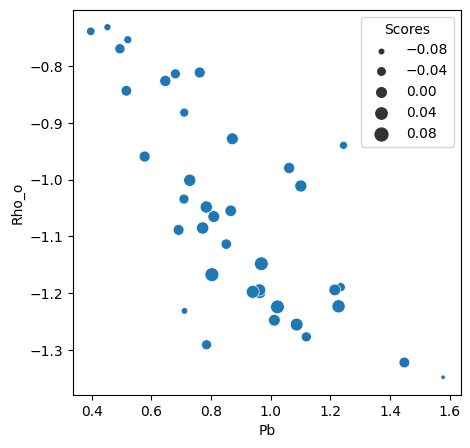

In [30]:
def IsolationForest(Data, n_est):
    from sklearn.ensemble import IsolationForest
    #Contamination is the percentage of outlier
    clf = IsolationForest(n_estimators = n_est)
    clf.fit(Data)
    Data['Scores'] = clf.decision_function(Data)
    print(Data['Scores'])
    fig=plt.figure(figsize=(5,5))
    plt.rc('xtick', labelsize = 10)
    plt.rc('ytick', labelsize = 10)
    #plt.scatter(Data['Pb'], Data['Rho_o'], c='red', alpha=0.9)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(10, 100))
    plt.show()
    #sns.pairplot(FAH, hue = 'Scores', corner=True)
    #plt.show()
    return

#COMP1 = std_data.loc[0:142,'Pb':]
FAH1 = FAH_S.loc[0:142,'Pb':]
#ILM1 = ILM_S.loc[0:142,'Pb':]
#SAR1 = SAR_S.loc[0:142,'Pb':]
#GAD1 = GAD_S.loc[0:142,'Pb':]
#KZH1 = KZH_S.loc[0:142,'Pb':]

#IsolationForest(COMP1, 10)
IsolationForest(FAH1, 10)
#IsolationForest(ILM1, 10)
#IsolationForest(SAR1, 10)
#IsolationForest(GAD1, 10)
#IsolationForest(KZH1, 10)

DBSCAN

Finding optimum epsilon

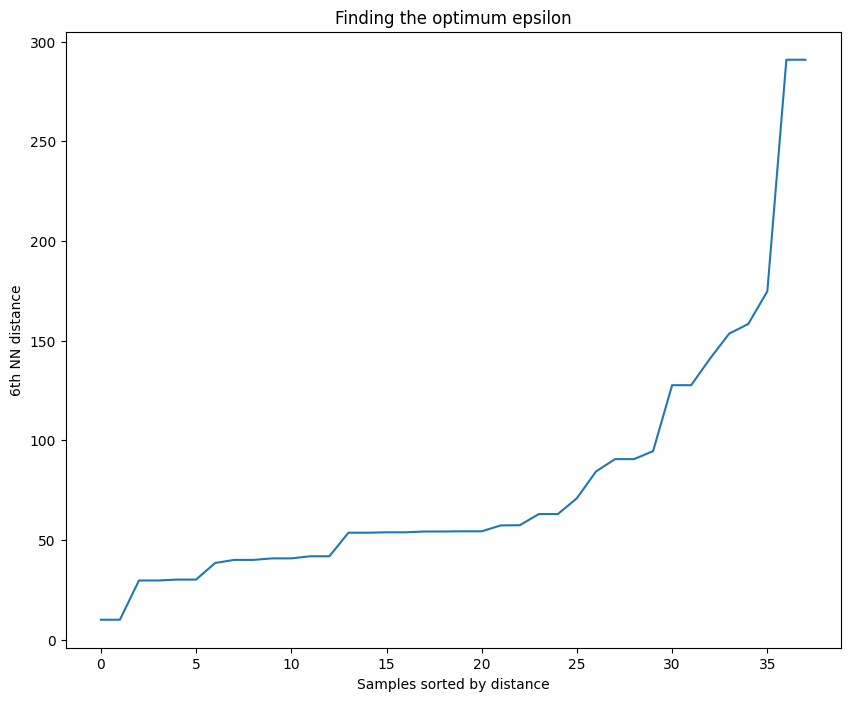

In [31]:
def OptimumEpsilonFinder (Data, n_nei):
    from sklearn.neighbors import NearestNeighbors
    Neighbors=NearestNeighbors(n_neighbors=n_nei)
    nbrs=Neighbors.fit(Data)
    distances, indices = nbrs.kneighbors(Data)
    fig=plt.figure(figsize=(10,8))
    distances=np.sort(distances, axis=0)
    distances=distances[:,1]
    plt.plot(distances)
    plt.title('Finding the optimum epsilon')
    plt.xlabel('Samples sorted by distance')
    plt.ylabel('6th NN distance')
    plt.show()
    return
OptimumEpsilonFinder (FAH.loc[0:142,'Pb':], 2)

DBSCAN Itself

0     -1
1     -1
2      0
7      0
8     -1
9     -1
10    -1
11    -1
12    -1
13     0
14     0
16    -1
24     0
25     0
26     0
52     0
55     0
56    -1
57     0
58     0
59     0
62     0
63     0
64     0
67     0
68     0
70     0
72     0
76     0
108    0
109    0
110   -1
121   -1
132    0
133    0
134    0
136    0
137   -1
Name: clusters, dtype: int64


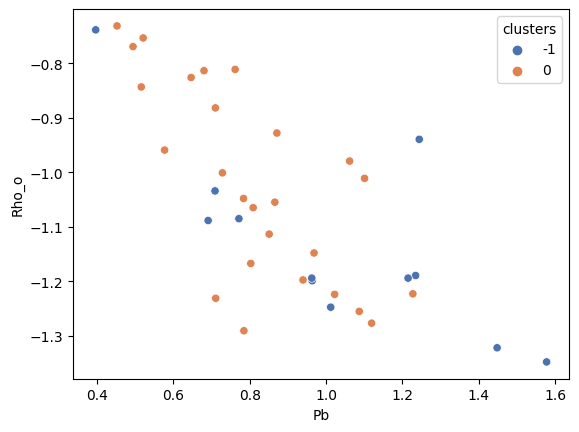

In [32]:
#COMP2 = std_data.loc[0:142,'Pb':]
FAH2 = FAH_S.loc[0:142,'Pb':]
#ILM2 = ILM_S.loc[0:142,'Pb':]
#SAR2 = SAR_S.loc[0:142,'Pb':]
#GAD2 = GAD_S.loc[0:142,'Pb':]
#KZH2 = KZH_S.loc[0:142,'Pb':]

def DBSCANN(Data, eps, min_sam):
    from sklearn.cluster import DBSCAN
    Clustering=DBSCAN(eps=eps ,min_samples=min_sam, metric='euclidean')
    DB=Clustering.fit_predict(Data)
    labels=pd.DataFrame(DB,columns=['clusters'])
    #FAH=pd.DataFrame(FAH,columns=data.columns[:])
    Data['clusters']=DB
    print(Data['clusters'])
    #data['clusters']=DB
    Group_by_mean=Data.groupby(by='clusters').mean()
    #print(Group_by_mean)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", hue = 'clusters', palette="deep")
    plt.show()
    #sns.pairplot(FAH, hue = 'clusters')
    #plt.show()
    return

#DBSCANN(COMP2, 2, 6)
DBSCANN(FAH2, 2, 6)
#DBSCANN(ILM2, 2, 6)
#DBSCANN(SAR2, 2, 6)
#DBSCANN(GAD2, 2, 6)
#DBSCANN(KZH2, 2, 6)

LOF

0     -1.656169
1     -1.672425
2     -1.024892
7     -0.995092
8     -1.659730
9     -1.714247
10    -1.634925
11    -1.785826
12    -1.703344
13    -0.990065
14    -1.010906
16    -1.323702
24    -0.988707
25    -0.990558
26    -0.994173
52    -1.029670
55    -0.989340
56    -1.461389
57    -0.985513
58    -0.981027
59    -0.975492
62    -0.988692
63    -0.990079
64    -0.990798
67    -0.997851
68    -1.075175
70    -0.988572
72    -1.013125
76    -1.004255
108   -0.989876
109   -1.014066
110   -1.052110
121   -1.058558
132   -1.014281
133   -0.998344
134   -0.995099
136   -0.995253
137   -1.077812
Name: Scores, dtype: float64


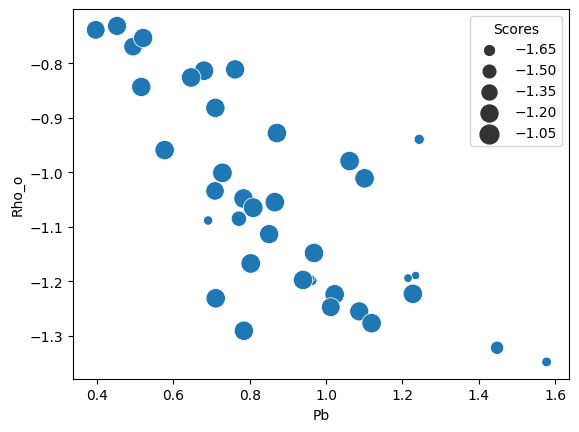

In [33]:
FAH3 = FAH_S.loc[0:142,'Pb':]
def LOF(Data, n_nei, con):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=n_nei, contamination=con,
                           metric='euclidean')
    hh= clf.fit(Data)
    Data['Scores']=clf.negative_outlier_factor_
    print(Data['Scores'])
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(20, 200))
    plt.show()
    return
LOF(FAH3, 20, 'auto')

OCSVM

0      3.428418
1      3.118437
2      7.045476
7      8.301324
8      5.526103
9      5.394060
10     5.546173
11     5.157051
12     5.488737
13     8.186190
14     7.438760
16     5.582123
24     8.240817
25     7.760306
26     8.849505
52     7.433251
55     8.415513
56     4.475928
57     8.223134
58     7.481633
59     7.635715
62     8.175733
63     7.438760
64     7.933409
67     7.502005
68     6.566384
70     7.600887
72     7.439588
76     7.816157
108    7.933855
109    7.854383
110    7.129372
121    7.438817
132    7.140783
133    7.224948
134    7.819972
136    8.650760
137    7.253452
Name: Scores, dtype: float64


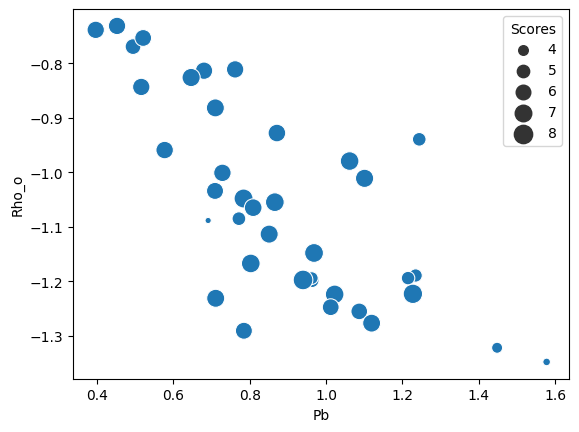

In [34]:
FAH4 = FAH_S.loc[0:142,'Pb':]
def OCSVM(Data, gamma):
    from sklearn.svm import OneClassSVM
    clf = OneClassSVM(gamma=gamma).fit(Data)
    clf.predict(Data)
    Data['Scores']=clf.score_samples(Data)
    print(Data['Scores'])
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size='Scores', sizes=(20, 200))
    plt.show()
    return
OCSVM(FAH4, 'auto')

ABOD